##MY FIRST LINEAR REGRESSION MODEL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('C:/Users/USER/Downloads/FuelConsumption.csv')

In [4]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import chardet
with open('C:/Users/USER/Downloads/FuelConsumption.csv', 'rb') as f:
    rawdata = f.read()
    result = chardet.detect(rawdata)
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")

Detected encoding: ascii


In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [11]:
df.isnull()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

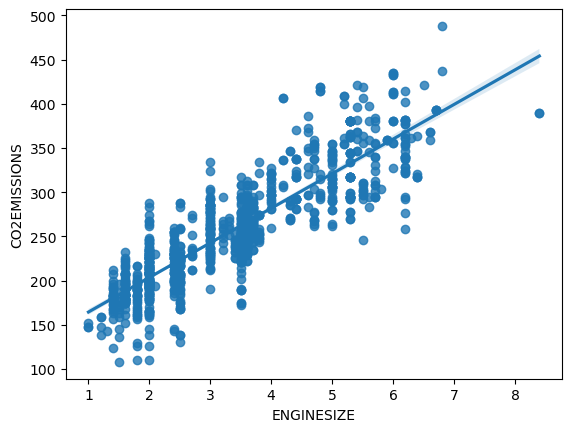

In [12]:
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)

In [13]:
df[['ENGINESIZE', 'CO2EMISSIONS']].corr()

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


In [14]:
lm = LinearRegression()
lm

LinearRegression()

In [15]:
x = df[['ENGINESIZE']]
y = df['CO2EMISSIONS']
lm.fit(x, y)

LinearRegression()

In [16]:
lm.coef_

array([39.12519979])

In [17]:
lm.intercept_

125.3040994953569

In [18]:
yhat = lm.predict(x)
yhat[0:4]

array([203.55449907, 219.20457898, 183.99189918, 262.24229875])

In [19]:
from sklearn.metrics import r2_score

In [20]:
print(r2_score, lm.score(x, y))

<function r2_score at 0x0000022688A29B20> 0.7641458597854816


In [29]:
np.mean((yhat - y) ** 2)

946.3140527188749

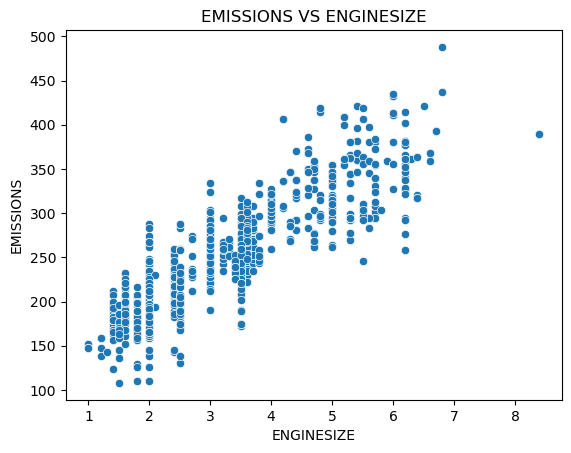

In [22]:
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.title('EMISSIONS VS ENGINESIZE')
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, yhat)



In [24]:
mse

946.3140527188749

In [25]:
r2_score = lm.score(x, y)

In [26]:
r2_score

0.7641458597854816

In [27]:
print(mse, r2_score)

946.3140527188749 0.7641458597854816


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

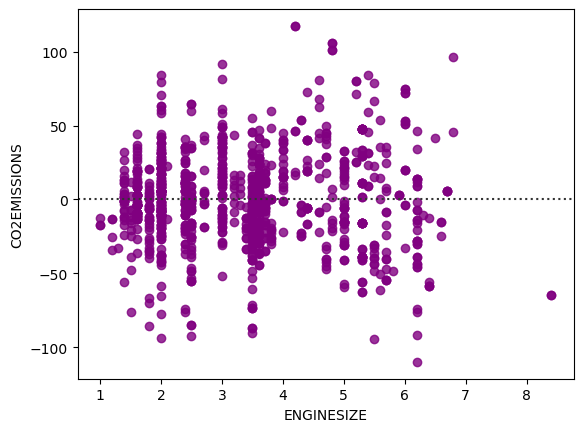

In [36]:
sns.residplot(x=df[['ENGINESIZE']], y=df[['CO2EMISSIONS']], color='purple')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y_data = df['CO2EMISSIONS']

In [40]:
x_data = df.drop('CO2EMISSIONS', axis=1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

In [43]:
x_test.shape[0]

321

In [44]:
x_train.shape[0]

746

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(x_train[['ENGINESIZE']], y_train)
lm.score(x_test[['ENGINESIZE']], y_test)

0.7245385677455163

In [47]:
lm.score(x_train[['ENGINESIZE']], y_train)

0.7782159514424312

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

In [49]:
lm.fit(x_train[['ENGINESIZE']], y_train)
lm.score(x_test[['ENGINESIZE']], y_test)

0.7476106578047947

In [50]:
lm.score(x_train[['ENGINESIZE']], y_train)

0.7734099662383285

In [51]:
from sklearn.model_selection import cross_val_score

In [53]:
df=df._get_numeric_data()
df.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


In [56]:
y_data = df['CO2EMISSIONS']

In [57]:
x_data=df.drop('CO2EMISSIONS',axis=1)

In [58]:
scores = cross_val_score(lm, x_data, y_data, cv=4)

In [59]:
scores

array([0.86904958, 0.81171909, 0.90148488, 0.93428135])

In [60]:
print("The mean of the folds are", scores.mean(), "and the standard deviation is" , scores.std())

The mean of the folds are 0.8791337251130151 and the standard deviation is 0.045241734194790946


In [61]:
-1 * cross_val_score(lm,x_data[['ENGINESIZE']], y_data,cv=4,scoring='neg_mean_squared_error')

array([ 992.83715367, 1119.87584056,  988.0606106 ,  731.95490003])

In [62]:
from sklearn.model_selection import cross_val_predict

In [63]:
yhat = cross_val_predict(lm,x_data[['ENGINESIZE']], y_data,cv=4)
yhat[0:5]

array([201.92132885, 217.47174197, 182.48331245, 260.23537804,
       260.23537804])

In [64]:
from sklearn.linear_model import Ridge

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [67]:
RR=Ridge()
RR

Ridge()

In [68]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [69]:
Grid1.fit(x_data[['ENGINESIZE']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [71]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=0.001)

In [72]:
BestRR.score(x_test[['ENGINESIZE']], y_test)

0.7516733419876335

##AUTHOR

###ADEWUYI THANNI AYOMIDE